# Clusterização K-Means

## Importando as Bibliotecas

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importando a Base de Dados

In [80]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.drop('CustomerID', axis = 1)

In [81]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [82]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x.Genre = le.fit_transform(x.Genre)

In [84]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Usando o Método Elbow para achar o Número Ótimo de Clusters

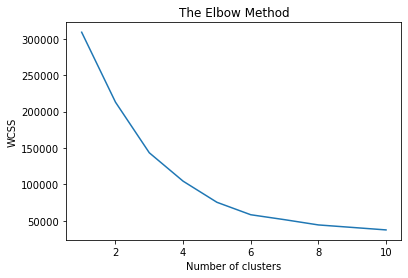

In [85]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Treinando o Modelo

In [86]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [88]:
x['cluster'] = y_kmeans

## Visualizando os Clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

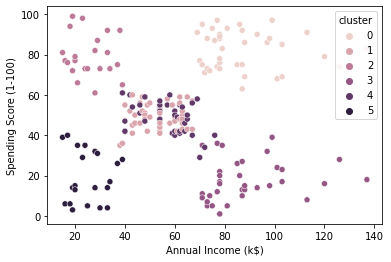

In [90]:
import seaborn as sns

sns.scatterplot(data = x, x = 'Annual Income (k$)', y =  'Spending Score (1-100)', hue = 'cluster')
